## Tf-Idf (Term frequency–Inverse document frequency)

Wikipedia definition:  ” Tf-Idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

### Term Frequency
It is simply the frequency in which a word appears in a document in comparison to the total number words in the document.

### Inverse Document Frequency

Term frequency has a disadvantage that it tends to give higher weights to words with higher frequency. In such cases words like ‘a’, ‘the’, ‘in’, ’of’ etc. appears more in the documents than other regular words. Thus, more important words are wrongly given lower weights as their frequency is less.
 To tackle this problem IDF was introduced. IDF decreases the weights of such high frequency terms and increases the weight of terms with rare occurrence

# Example 1

The sklearn.feature_extraction module can be **used to extract features in a format supported by machine learning algorithms** from datasets consisting of formats such as text and image.

transforming arbitrary data, such as text or images, into numerical features usable for machine learning

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfid = TfidfVectorizer(smooth_idf=False)   #if anytime we get zero, then add 1 to it

doc= ["This is an example.","We will see how it works.","IDF can be confusing"]
doc_vector = tfid.fit_transform(doc)

print(tfid.get_feature_names())

['an', 'be', 'can', 'confusing', 'example', 'how', 'idf', 'is', 'it', 'see', 'this', 'we', 'will', 'works']


C:\Users\91890\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#column name is the feature names 

df= pd.DataFrame(doc_vector.todense(),columns=tfid.get_feature_names())
df

,an,be,can,confusing,example,how,idf,is,it,see,this,we,will,works
0,0.5,0.0,0.0,0.0,0.5,0.000000,0.0,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.408248,0.0,0.0,0.408248,0.408248,0.0,0.408248,0.408248,0.408248
2,0.0,0.5,0.5,0.5,0.0,0.000000,0.5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [4]:
print(doc_vector)

  (0, 4)	0.5
  (0, 0)	0.5
  (0, 7)	0.5
  (0, 10)	0.5
  (1, 13)	0.40824829046386296
  (1, 8)	0.40824829046386296
  (1, 5)	0.40824829046386296
  (1, 9)	0.40824829046386296
  (1, 12)	0.40824829046386296
  (1, 11)	0.40824829046386296
  (2, 3)	0.5
  (2, 1)	0.5
  (2, 2)	0.5
  (2, 6)	0.5


fit_transform() method on our training data

transform() method on our test data


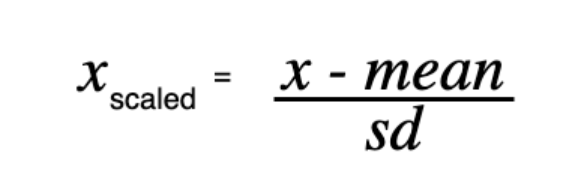

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

# Example 2

In [5]:
# Using function

def text_matrix(message, vect):  #input documents,vectorizer used
    terms_doc = vect.fit_transform(message)  #applying the vectorizer on the tfid vectorizer
    return pd.DataFrame(terms_doc.toarray(),columns=vect.get_feature_names()) #it is made into datafram

In [6]:
# We will call the function created earlier
feb_message = ["What is that covid covid",
              "covid is nothing",
              "covid cases are dropping"]


tf = TfidfVectorizer()

#Passing same message with TF-IDF

text_matrix(feb_message,tf)

C:\Users\91890\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,are,cases,covid,dropping,is,nothing,that,what
0,0.000000,0.000000,0.592567,0.000000,0.381519,0.000000,0.501651,0.501651
1,0.000000,0.000000,0.425441,0.000000,0.547832,0.720333,0.000000,0.000000
2,0.546454,0.546454,0.322745,0.546454,0.000000,0.000000,0.000000,0.000000


In [7]:
# Importance of Covid increased based on the occurance and total document
jul_message = ["What is that covid covid",
              "covid is bad"]

text_matrix(jul_message,tf)

C:\Users\91890\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,covid,is,that,what
0,0.000000,0.668501,0.334251,0.469778,0.469778
1,0.704909,0.501549,0.501549,0.000000,0.000000
